In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd '/content/gdrive/My Drive/'

/content/gdrive/My Drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.models import Sequential
from keras.layers.pooling import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split 
from sklearn import metrics

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = "catbreeds/"

file_path = []
file_name = []
labels = []

for dirpath, dirnames, files in os.walk(path):
    for filename in files:
        file_path.append(os.path.join(dirpath, filename))

for image_file in file_path:
    label = image_file.split(os.path.sep)[-2]
    file_name.append(image_file)
    labels.append(label)

print('Jumlah dataset labels:', len(file_name))

Jumlah dataset labels: 13060


In [ ]:
# Define Input Parameters
shape = (299, 299)
channel = (3, )
input_size = shape + channel

#batch size
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                 rotation_range = 30, 
                                 width_shift_range = 0.2,
                                 height_shift_range = 0.2,
                                 shear_range = 0.2,
                                 zoom_range = 0.2,
                                 horizontal_flip = True)

test_datagen =  ImageDataGenerator(rescale = 1. / 255,
                                  horizontal_flip = True)

train_gen = train_datagen.flow_from_directory('catbreeds/train/',
                                            target_size = shape,
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            shuffle = True)

val_gen = test_datagen.flow_from_directory('catbreeds/val/',
                                          target_size = shape,
                                          batch_size = batch_size,
                                          class_mode = 'categorical',
                                          shuffle = False)

test_gen= test_datagen.flow_from_directory('catbreeds/test/',
                                          target_size = shape,
                                          batch_size = batch_size,
                                          class_mode = 'categorical',
                                          shuffle = False)

Found 10446 images belonging to 5 classes.
Found 1302 images belonging to 5 classes.
Found 1312 images belonging to 5 classes.


In [ ]:
num_class = test_gen.num_classes
label_class = train_gen.class_indices

print(label_class)

{'Bengal': 0, 'Calico': 1, 'Persian': 2, 'Siamese': 3, 'Sphynx': 4}


In [ ]:
base_model = Xception(include_top=False, weights='imagenet', input_tensor=None, 
                      input_shape=input_size, pooling=max, classes=num_class,
                      classifier_activation='softmax')

# adding custom layers
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation = 'softmax'))

base_model.trainable = False

model.summary()

83697664/83683744 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 21,387,309
Trainable params: 525,829
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
model.compile(optimizer = Adam(),
             loss="categorical_crossentropy",
             metrics=["acc"])

base_path = 'train_model'
trained_model_path = base_path + 'cat_model/'
model_names = trained_model_path + '.{epoch:02d}-{val_acc:.2f}.h5'

earlystopping = EarlyStopping(monitor ="val_loss", 
                              mode = "auto", patience = 15, 
                              restore_best_weights = True)

checkpoint = ModelCheckpoint(model_names, monitor = 'val_loss',
                             mode = 'auto', verbose = 1,
                             save_best_only = True)

history = model.fit(train_gen,
                    steps_per_epoch = len(train_gen),
                    validation_data = val_gen,
                    validation_steps = len(val_gen),
                    epochs = 100, verbose = 1, callbacks=[checkpoint, earlystopping])

Epoch 1/100
327/327 [==============================] - 3145s 10s/step - loss: 0.4285 - acc: 0.8496 - val_loss: 0.2760 - val_acc: 0.8971

Epoch 00001: val_loss improved from inf to 0.27604, saving model to train_modelcat_model/.01-0.90.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
327/327 [==============================] - 315s 964ms/step - loss: 0.3522 - acc: 0.8778 - val_loss: 0.2733 - val_acc: 0.8963

Epoch 00002: val_loss improved from 0.27604 to 0.27325, saving model to train_modelcat_model/.02-0.90.h5
Epoch 3/100
327/327 [==============================] - 319s 973ms/step - loss: 0.3239 - acc: 0.8873 - val_loss: 0.2655 - val_acc: 0.9040

Epoch 00003: val_loss improved from 0.27325 to 0.26548, saving model to train_modelcat_model/.03-0.90.h5
Epoch 4/100
327/327 [==============================] - 315s 962ms/step - loss: 0.3080 - acc: 0.8912 - val_loss: 0.2823 - val_acc: 0.8986

Epoch 00004: val_loss did not improve from 0.26548
Epoch 5/100
327/327 [==============================] - 314s 960ms/step - loss: 0.2981 - acc: 0.8958 - val_loss: 0.2484 - val_acc: 0.9109

Epoch 00005: val_loss improved from 0.26548 to 0.24837, saving model to train_modelcat_model/.05-0.91.h5
Epoch 6/100
327/327 [==============================] - 311s 951ms/step - loss: 0.2

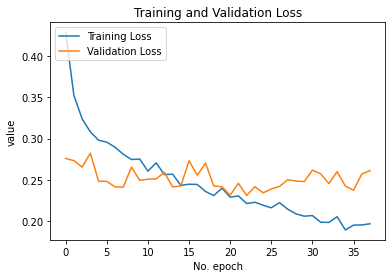

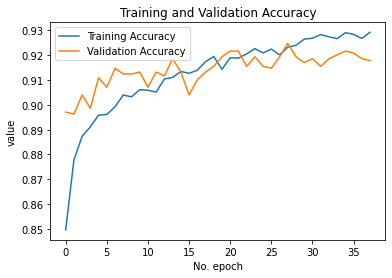

In [ ]:
history.history['loss']
history.history['acc']

plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc = "upper left")
plt.show()

plt.plot(history.history['acc'], label = 'Training Accuracy')
plt.plot(history.history['val_acc'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred = model.predict(test_gen)
predictions = np.argmax(pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_gen.classes, predictions))

print('Classification Report')
target_names = ['Bengal', 'Calico', 'Persian', 'Siamese', 'Sphynx']
print(classification_report(test_gen.classes, predictions, target_names=target_names))

Confusion Matrix
[[227  14   2   6   0]
 [ 16 312   8  11   1]
 [  3   1 393   6   0]
 [  4   7   8 271   0]
 [  1   0   0   1  20]]
Classification Report
              precision    recall  f1-score   support

      Bengal       0.90      0.91      0.91       249
      Calico       0.93      0.90      0.91       348
     Persian       0.96      0.98      0.97       403
     Siamese       0.92      0.93      0.93       290
      Sphynx       0.95      0.91      0.93        22

    accuracy                           0.93      1312
   macro avg       0.93      0.93      0.93      1312
weighted avg       0.93      0.93      0.93      1312



In [ ]:
model.save('saved_model/cat_model/catnew_model.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


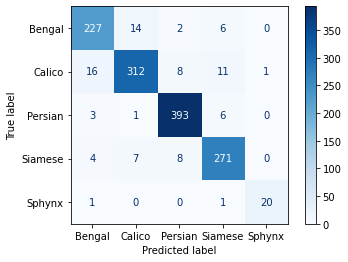

In [ ]:
cm = confusion_matrix(test_gen.classes, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues, values_format = 'd')
plt.show()